In [4]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #adjusts the configuration of the plots we will create

#Read in the data

df = pd.read_csv(r"C:\Users\Dibyajyoti Das\Desktop\Py\movies.csv")  #r is necessary to include in path otherwise it shows error

In [19]:
#look in the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [8]:
#missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
#some columns have missing areas so we will just delete them for now
df = df.dropna()

In [20]:
#data types of our columns
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [13]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [18]:
df['yearcorrect'] = df['released'].astype(str).str.split(',').str[-1].astype(str).str[:5]

In [33]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [22]:
#show everything on the dataset

pd.set_option('display.max_rows',None)

In [27]:
#duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [31]:
df[['name','budget']].sort_values(by='budget',ascending=False)

name     budget
7445                                  Avengers: Endgame  356000000
7244                             Avengers: Infinity War  321000000
7075            Star Wars: Episode VIII - The Last Jedi  317000000
7066                                     Justice League  300000000
5060           Pirates of the Caribbean: at World's End  300000000
7463      Star Wars: Episode IX - The Rise of Skywalker  275000000
7261                            Solo: A Star Wars Story  275000000
4870                                   Superman Returns  270000000
7480                                      The Lion King  260000000
5658                                            Tangled  260000000
5057                                       Spider-Man 3  258000000
5451             Harry Potter and the Half-Blood Prince  250000000
6846                         Captain America: Civil War  250000000
5860        Pirates of the Caribbean: on Stranger Tides  250000000
6870                 Batman v Superman: Dawn of Justice  250000000
6079                                        John Carter  250000000
6047                              The Dark Knight Rises  250000000
7055                            The Fate of the Furious  250000000
6455          The Hobbit: The Battle of the Five Armies  250000000
6644                            Avengers: Age of Ultron  250000000
6665                                            Spectre  245000000
6663         Star Wars: Episode VII - The Force Awakens  245000000
5445                                             Avatar  237000000
7068   Pirates of the Caribbean: Dead Men Tell No Tales  230000000
6061                             The Amazing Spider-Man  230000000
6101                                     Men in Black 3  225000000
5291           The Chronicles of Narnia: Prince Caspian  225000000
4852         Pirates of the Caribbean: Dead Man's Chest  225000000
6253                The Hobbit: The Desolation of Smaug  225000000
6254                                       Man of Steel  225000000
6043                                       The Avengers  220000000
7087                      Transformers: The Last Knight  217000000
6295                          Oz the Great and Powerful  215000000
6336                                    The Lone Ranger  215000000
4876                              X-Men: the Last Stand  210000000
6494                    Transformers: Age of Extinction  210000000
6080                                         Battleship  209000000
4659                                          King Kong  207000000
7643                                              Tenet  205000000
5474                               Terminator Salvation  200000000
5468                Transformers: Revenge of the Fallen  200000000
5701                Prince of Persia: the Sands of Time  200000000
4265                 Terminator 3: Rise of the Machines  200000000
5855                                      Green Lantern  200000000
7247                                      Black Panther  200000000
5644                                         Iron Man 2  200000000
5453                                               2012  200000000
6908                                       Finding Dory  200000000
6267                                Monsters University  200000000
7455              Fast & Furious Presents: Hobbs & Shaw  200000000
6244                                         Iron Man 3  200000000
4459                                       Spider-Man 2  200000000
6478                           The Amazing Spider-Man 2  200000000
6463                         X-Men: Days of Future Past  200000000
7281                                      Incredibles 2  200000000
6869                       Rogue One: A Star Wars Story  200000000
7488                                        Toy Story 4  200000000
5685                                        Toy Story 3  200000000
7296        Fantastic Beasts: The Crimes of Grindelwald  200000000
7493                           

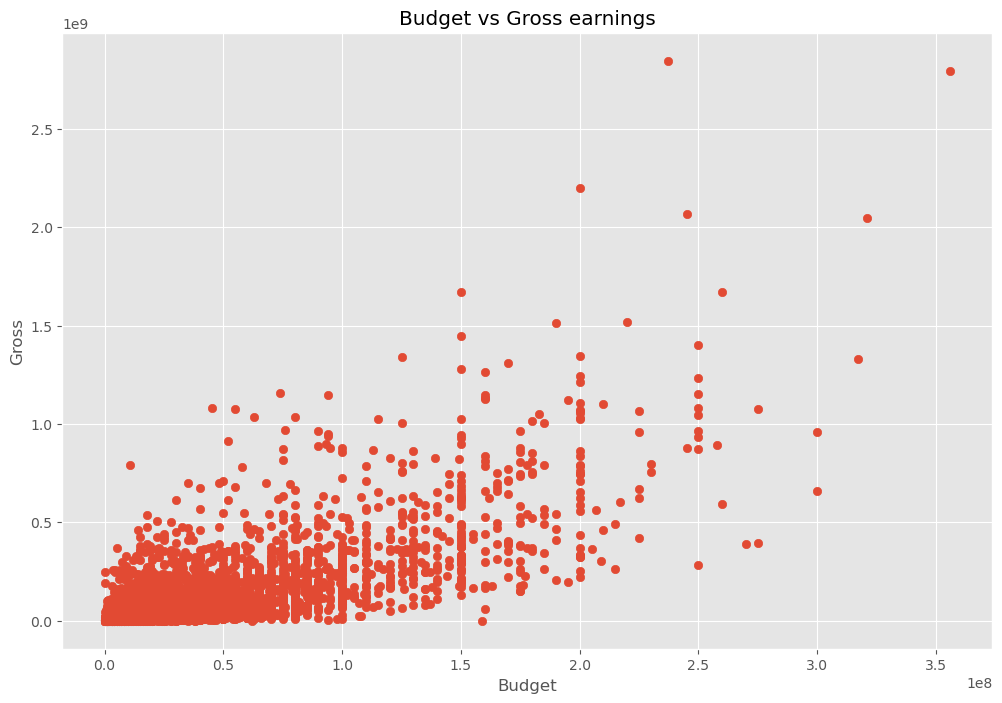

In [56]:
#scatter plot to compare budge and gross revenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [35]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

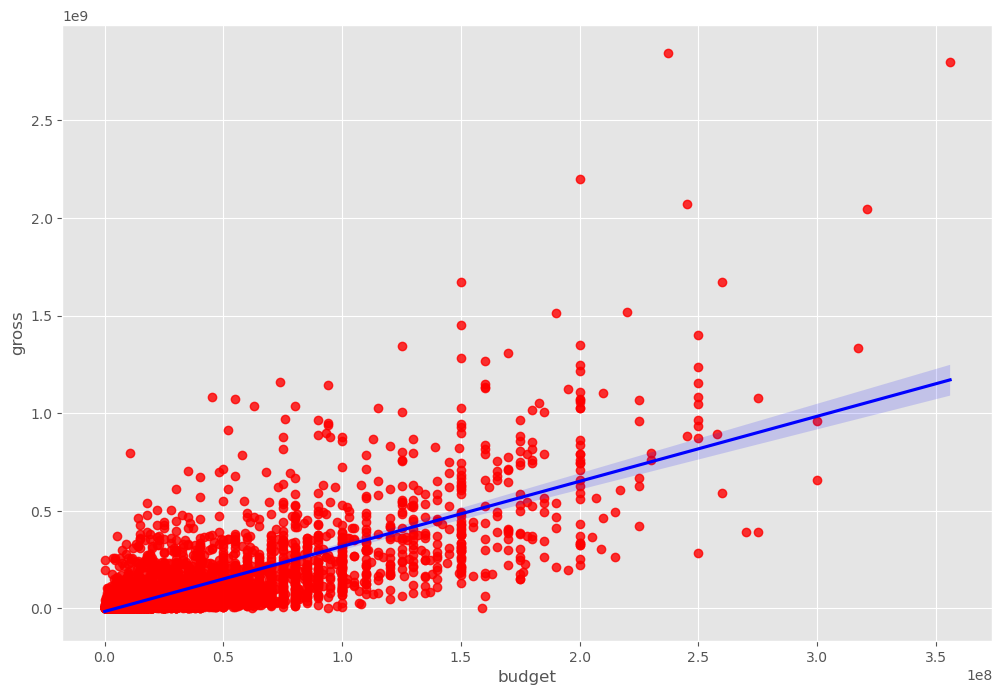

In [38]:
#reg plot
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [39]:
#how much correlation?
df.corr() #pearson method

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

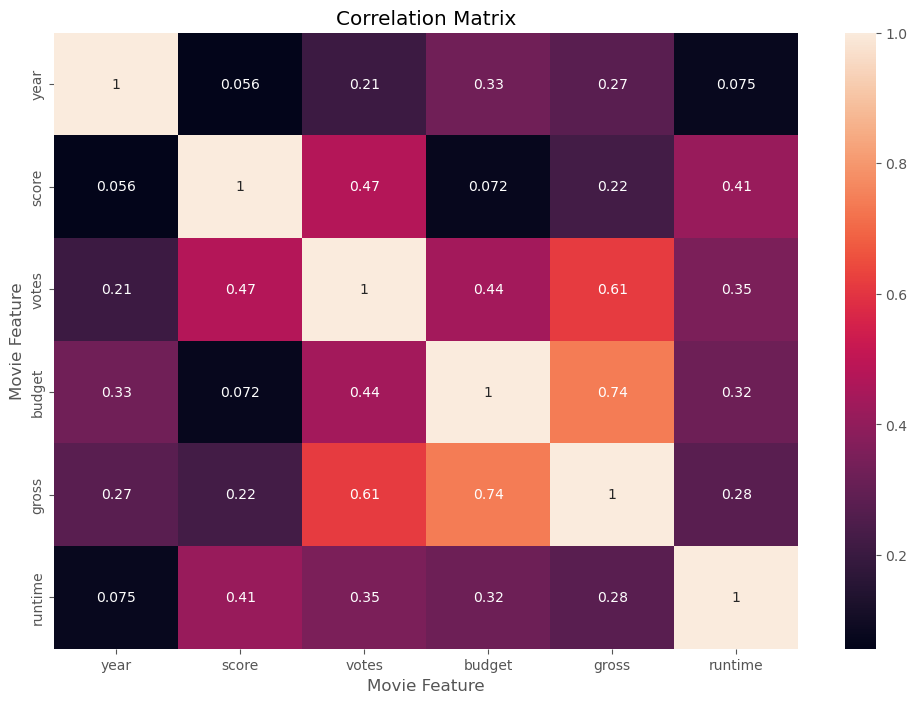

In [41]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [42]:
#uaing factorize - this assigns a random numeric value to each catogory

df.apply(lambda x:x.factorize()[0]).corr()

name    rating     genre      year  released     score  \
name         1.000000  0.314800  0.186668  0.267282  0.667785  0.136453   
rating       0.314800  1.000000  0.031419  0.096638  0.241253 -0.075109   
genre        0.186668  0.031419  1.000000  0.075279  0.115079  0.047421   
year         0.267282  0.096638  0.075279  1.000000  0.359792  0.045163   
released     0.667785  0.241253  0.115079  0.359792  1.000000  0.099608   
score        0.136453 -0.075109  0.047421  0.045163  0.099608  1.000000   
votes        0.608411  0.121122  0.177836  0.286895  0.481682  0.247863   
director     0.679808  0.230190  0.131437  0.186504  0.478950  0.176116   
writer       0.764057  0.251470  0.129595  0.231664  0.541155  0.122357   
star         0.599410  0.226007  0.143735  0.240670  0.439566  0.139126   
country      0.124405  0.111309 -0.055109 -0.047325  0.095519 -0.057087   
budget       0.526690  0.283770  0.175071  0.190333  0.396934 -0.005767   
gross        0.986431  0.319778  0.185075  0.277721  0.677897  0.139819   
company      0.631721  0.269792  0.080643  0.136096  0.410407  0.022732   
runtime      0.089567  0.029208  0.011329  0.037011  0.058183  0.057866   
yearcorrect  0.268540  0.090900  0.072080  0.946455  0.365258  0.054386   

                votes  director    writer      star   country    budget  \
name         0.608411  0.679808  0.764057  0.599410  0.124405  0.526690   
rating       0.121122  0.230190  0.251470  0.226007  0.111309  0.283770   
genre        0.177836  0.131437  0.129595  0.143735 -0.055109  0.175071   
year         0.286895  0.186504  0.231664  0.240670 -0.047325  0.190333   
released     0.481682  0.478950  0.541155  0.439566  0.095519  0.396934   
score        0.247863  0.176116  0.122357  0.139126 -0.057087 -0.005767   
votes        1.000000  0.472671  0.522918  0.429085  0.013363  0.317842   
director     0.472671  1.000000  0.642875  0.504992  0.123672  0.443150   
writer       0.522918  0.642875  1.000000  0.510628  0.138299  0.449523   
star         0.429085  0.504992  0.510628  1.000000  0.106459  0.457442   
country      0.013363  0.123672  0.138299  0.106459  1.000000  0.112280   
budget       0.317842  0.443150  0.449523  0.457442  0.112280  1.000000   
gross        0.620450  0.692902  0.776528  0.612142  0.123874  0.532810   
company      0.346864  0.528071  0.532013  0.455443  0.177990  0.476917   
runtime      0.088525  0.084943  0.066645  0.096652  0.020546  0.092727   
yearcorrect  0.290308  0.195499  0.233546  0.246565 -0.042215  0.190953   

                gross   company   runtime  yearcorrect  
name         0.986431  0.631721  0.089567     0.268540  
rating       0.319778  0.269792  0.029208     0.090900  
genre        0.185075  0.080643  0.011329     0.072080  
year         0.277721  0.136096  0.037011     0.946455  
released     0.677897  0.410407  0.058183     0.365258  
score        0.139819  0.022732  0.057866     0.054386  
votes        0.620450  0.346864  0.088525     0.290308  
director     0.692902  0.528071  0.084943     0.195499  
writer       0.776528  0.532013  0.066645     0.233546  
star         0.612142  0.455443  0.096652     0.246565  
country      0.123874  0.177990  0.020546    -0.042215  
budget       0.532810  0.476917  0.092727     0.190953  
gross        1.000000  0.637241  0.088572     0.278125  
company      0.637241  1.000000  0.069329     0.141714  
runtime      0.088572  0.069329  1.000000     0.038105  
yearcorrect  0.278125  0.141714  0.038105     1.000000

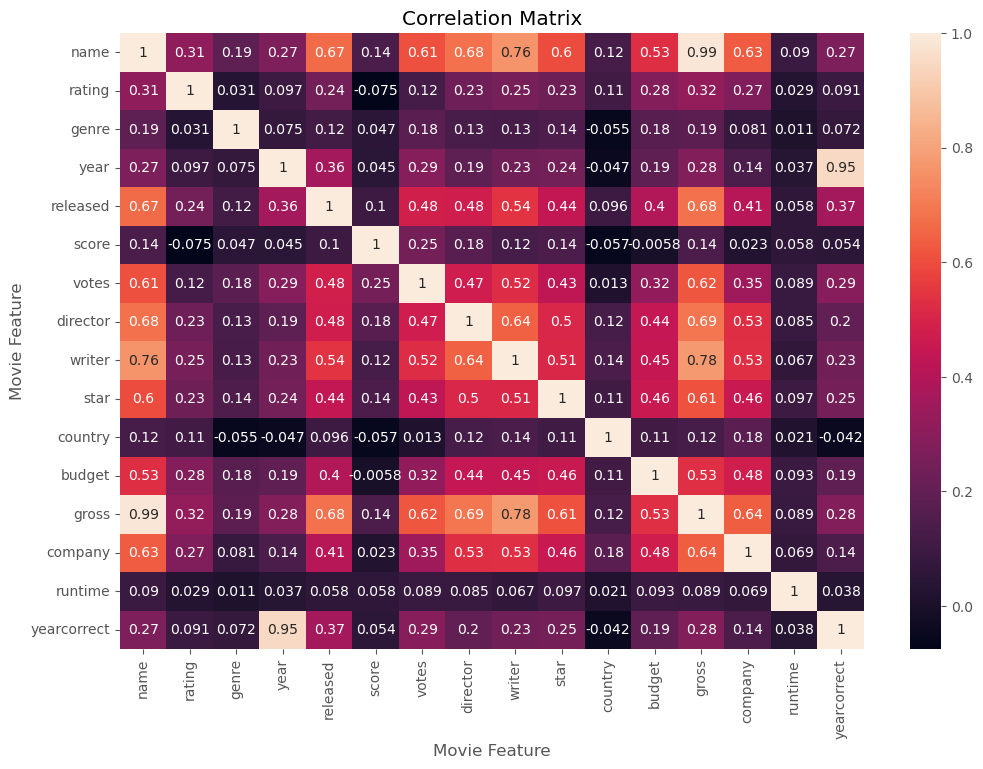

In [43]:
correlation_matrix = df.apply(lambda x:x.factorize()[0]).corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [44]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667785
             score          0.136453
             votes          0.608411
             director       0.679808
             writer         0.764057
             star           0.599410
             country        0.124405
             budget         0.526690
             gross          0.986431
             company        0.631721
             runtime        0.089567
             yearcorrect    0.268540
rating       name           0.314800
             rating         1.000000
             genre          0.031419
             year           0.096638
             released       0.241253
             score         -0.075109
             votes          0.121122
             director       0.230190
             writer         0.251470
             star           0.226007
             country        0.111309
 

In [46]:
sorted_pairs = corr_pairs.sort_values(kind = "quicksort")

print(sorted_pairs)

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
country      genre         -0.055109
year         country       -0.047325
country      year          -0.047325
yearcorrect  country       -0.042215
country      yearcorrect   -0.042215
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
country      runtime        0.020546
runtime      country        0.020546
company      score          0.022732
score        company        0.022732
rating       runtime        0.029208
runtime      rating         0.029208
genre        rating         0.031419
rating       genre          0.031419
runtime      year           0.037011
year         runtime        0.037011
runtime      yearcorrect    0.038105
y

In [47]:
#looking at data with correlation

sorted_pairs = sorted_pairs[abs(sorted_pairs)>0.5]
print(sorted_pairs)

director     star           0.504992
star         director       0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
             writer         0.532013
writer       company        0.532013
gross        budget         0.532810
budget       gross          0.532810
released     writer         0.541155
writer       released       0.541155
star         name           0.599410
name         star           0.599410
votes        name           0.608411
name         votes          0.608411
star         gross          0.612142
gross        star           0.612142
             votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
gross        company        0.637241
c

In [49]:
#looking at top 15 companies by revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(by = 'gross',ascending=False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [51]:
df.groupby(['company','year'])[['gross']].sum()

gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1990     5835247
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2017     5042014
360 Pictures                                       2007     9669758
3Mark Entertainment                                2001     4760014
4 Kids Entertainment                               1999   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                   2004     1526951
4Kids Entertainment                                2007    95802916
7 Arts International                               1999      206128
7 Films Cinéma                                     2000     3033646
88 Productions                                     1990    10005969
888 Productions                                    1990   201965915
900 Films                                          2003     5141166
98 MPH Productions                                 2002    80693537
A Band Apart                                       1995     3734870
                                                   1996       49620
                                                   2002    14946150
A&M Films                                          1984     1455045
                                                   1988      161004
                                                   1992     1526697
                                                  

In [55]:
df_numerized = df

for col_names in df_numerized:
    if(df_numerized[col_names].dtype=='object'):
        df_numerized[col_names] = df_numerized[col_names].astype('category')
        df_numerized[col_names] = df_numerized[col_names].cat.codes
        
df_numerized
    

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
7480  4388       4      2  2019      1126    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       165    7.1   370000.0       809     481   
7494  1530       4      2  2019      2053    6.8   148000.0       277    1383   
6644   387       5      0  2015      1712    7.3   777000.0      1060    1646   
7247   567       5      0  2018       723    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000.0       452    2862   
7075  3644       5      0  2017       500    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000.0       764     777   
6262  1529       4      2  2013      2082    7.4   585000.0       277    1383   
7072   477       4      7  2017      1561    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1325    7.6   263000.0       193     327   
7055  4119       5      0  2017        45    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1881    7.1   779000.0      1767     837   
6688  2545       4      2  2015      1050    6.4   218000.0      1144     362   
6846   750       5      0  2016      1910    7.8   694000.0       105     513   
7250   343       5      0  2018       565    6.9   404000.0       809     699   
4245  4407       5      0  2003       516    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000.0      1019     479   
7456   755       5      0  2019      1697    6.8   478000.0        96     182   
5878  4950       5      0  2011      1442    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2148    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1394    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       553    6.5   394000.0       768     489   
7450  2091       6      5  2019      2321    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000.0       674    2927   
6869  3260       5      0  2016       509    7.8   572000.0       615     492   
7481   206       4      1  2019      1837    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1803    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1292    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000.0        81     153   
3451  3637       4      0  1999      1778    6.5   748000.0       653    1046   
5667   215       4      1  2010      1679    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000.0       239     390   
6045  4240       5      1  2012       492    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1987    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

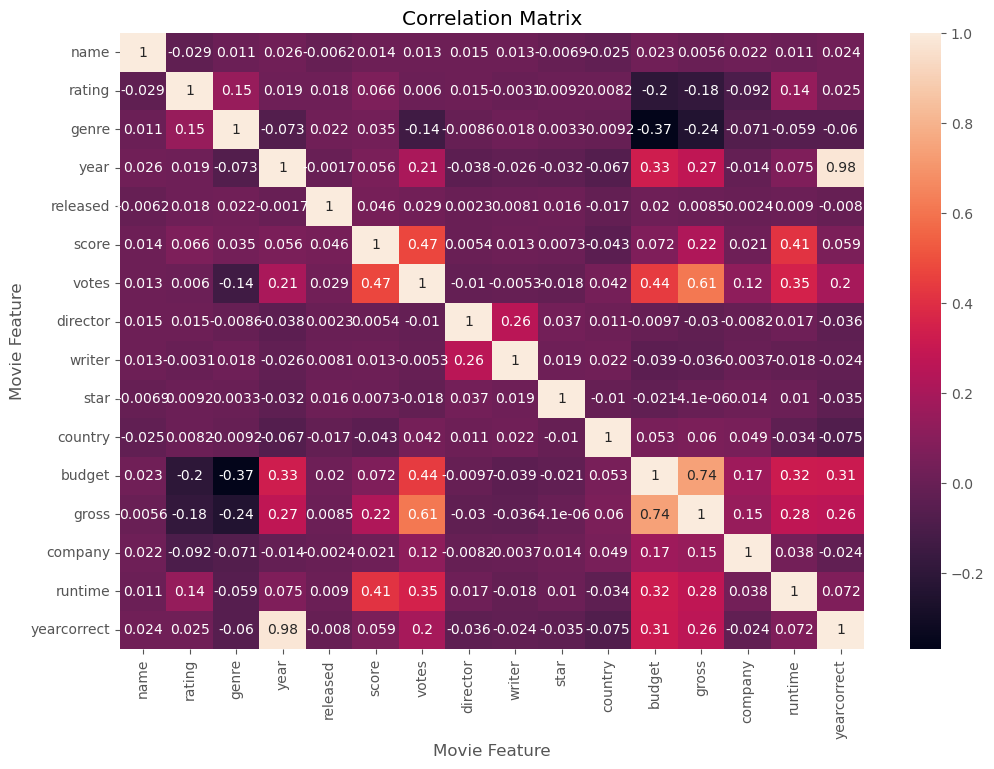

In [57]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()